# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [255]:
#Had to pip install CityPy
# pip install citipy

In [256]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [257]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [102]:
# Set the API base URL 
# Note: used units = Imperial to get Fahrenheit. Default temps are in Kelvin 
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    city_weather =  response = requests.get(city_url).json()

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lng = city_weather["coord"]["lon"]   
        city_lat = city_weather["coord"]["lat"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date =  city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qaanaaq
Processing Record 2 of Set 1 | udachnyy
Processing Record 3 of Set 1 | portland
Processing Record 4 of Set 1 | bathsheba
Processing Record 5 of Set 1 | anadyr
Processing Record 6 of Set 1 | samusu
City not found. Skipping...
Processing Record 7 of Set 1 | dikson
Processing Record 8 of Set 1 | mar del plata
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | sao joao da barra
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | airai
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | sept-iles
Processing Record 16 of Set 1 | narsaq
Processing Record 17 of Set 1 | taltal
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | camacha
Processing Record 21 of Set 1 | kodiak
Processing Record 22 of Set 1 | ko samui
Processing Re

Processing Record 36 of Set 4 | caravelas
Processing Record 37 of Set 4 | simao
Processing Record 38 of Set 4 | ljungby
Processing Record 39 of Set 4 | georgiyevka
Processing Record 40 of Set 4 | the pas
Processing Record 41 of Set 4 | erzincan
Processing Record 42 of Set 4 | barrow
Processing Record 43 of Set 4 | san patricio
Processing Record 44 of Set 4 | schieren
Processing Record 45 of Set 4 | davila
Processing Record 46 of Set 4 | kapiri mposhi
Processing Record 47 of Set 4 | hasaki
Processing Record 48 of Set 4 | miramar
Processing Record 49 of Set 4 | jian
Processing Record 0 of Set 5 | samarai
Processing Record 1 of Set 5 | port hawkesbury
Processing Record 2 of Set 5 | faanui
Processing Record 3 of Set 5 | trairi
Processing Record 4 of Set 5 | tecoanapa
Processing Record 5 of Set 5 | georgetown
Processing Record 6 of Set 5 | huadian
Processing Record 7 of Set 5 | paramirim
Processing Record 8 of Set 5 | snyder
Processing Record 9 of Set 5 | clyde river
Processing Record 10 of

Processing Record 26 of Set 8 | selb
Processing Record 27 of Set 8 | mendahara
City not found. Skipping...
Processing Record 28 of Set 8 | beba
Processing Record 29 of Set 8 | batesville
Processing Record 30 of Set 8 | zhengjiatun
Processing Record 31 of Set 8 | katsuura
Processing Record 32 of Set 8 | bandarbeyla
Processing Record 33 of Set 8 | burnie
Processing Record 34 of Set 8 | salina cruz
Processing Record 35 of Set 8 | bichura
Processing Record 36 of Set 8 | catuday
Processing Record 37 of Set 8 | kuala terengganu
Processing Record 38 of Set 8 | port hedland
Processing Record 39 of Set 8 | kasongo-lunda
Processing Record 40 of Set 8 | saint-pierre
Processing Record 41 of Set 8 | puerto leguizamo
Processing Record 42 of Set 8 | alugan
Processing Record 43 of Set 8 | port said
Processing Record 44 of Set 8 | pevek
Processing Record 45 of Set 8 | ilulissat
Processing Record 46 of Set 8 | tobetsu
Processing Record 47 of Set 8 | hofn
Processing Record 48 of Set 8 | ambodifototra
Cit

Processing Record 12 of Set 12 | berlevag
Processing Record 13 of Set 12 | sistranda
Processing Record 14 of Set 12 | yurginskoye
Processing Record 15 of Set 12 | port saint john
Processing Record 16 of Set 12 | chagda
City not found. Skipping...
Processing Record 17 of Set 12 | araouane
Processing Record 18 of Set 12 | herat
Processing Record 19 of Set 12 | batemans bay
Processing Record 20 of Set 12 | port-cartier
Processing Record 21 of Set 12 | kenai
Processing Record 22 of Set 12 | middelburg
Processing Record 23 of Set 12 | high level
Processing Record 24 of Set 12 | bad mergentheim
Processing Record 25 of Set 12 | koumac
Processing Record 26 of Set 12 | apahida
Processing Record 27 of Set 12 | haapu
City not found. Skipping...
Processing Record 28 of Set 12 | fonte boa
Processing Record 29 of Set 12 | mandalgovi
Processing Record 30 of Set 12 | kuntaur
Processing Record 31 of Set 12 | slavgorod
Processing Record 32 of Set 12 | vostok
Processing Record 33 of Set 12 | utete
Proces

In [114]:
city_weather

{'coord': {'lon': -23.2167, 'lat': 15.1333},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 79.59,
  'feels_like': 79.59,
  'temp_min': 79.59,
  'temp_max': 79.59,
  'pressure': 1013,
  'humidity': 82,
  'sea_level': 1013,
  'grnd_level': 1013},
 'visibility': 10000,
 'wind': {'speed': 16.31, 'deg': 359, 'gust': 18.21},
 'clouds': {'all': 0},
 'dt': 1679254683,
 'sys': {'type': 1,
  'id': 2462,
  'country': 'CV',
  'sunrise': 1679211481,
  'sunset': 1679255009},
 'timezone': -3600,
 'id': 3374120,
 'name': 'Vila do Maio',
 'cod': 200}

In [286]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [287]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,qaanaaq,77.4840,-69.3632,-9.09,67,13,6.67,GL,1679254224
1,udachnyy,66.4167,112.4000,-36.69,100,100,4.99,RU,1679254225
2,portland,45.5234,-122.6762,60.46,59,75,11.50,US,1679254124
3,bathsheba,13.2167,-59.5167,84.81,58,40,21.85,BB,1679254234
4,anadyr,64.7500,177.4833,16.30,85,40,5.99,RU,1679254235


In [288]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

PermissionError: [Errno 13] Permission denied: '../output_data/cities.csv'

In [289]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qaanaaq,77.4840,-69.3632,-9.09,67,13,6.67,GL,1679254224
1,udachnyy,66.4167,112.4000,-36.69,100,100,4.99,RU,1679254225
2,portland,45.5234,-122.6762,60.46,59,75,11.50,US,1679254124
3,bathsheba,13.2167,-59.5167,84.81,58,40,21.85,BB,1679254234
4,anadyr,64.7500,177.4833,16.30,85,40,5.99,RU,1679254235


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

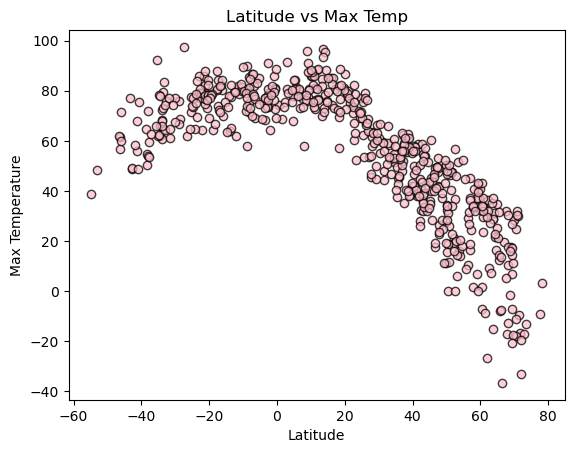

In [290]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]
plt.title('Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.scatter(x_axis, y_axis, marker="o", facecolors="pink", edgecolors="black", alpha=0.75)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

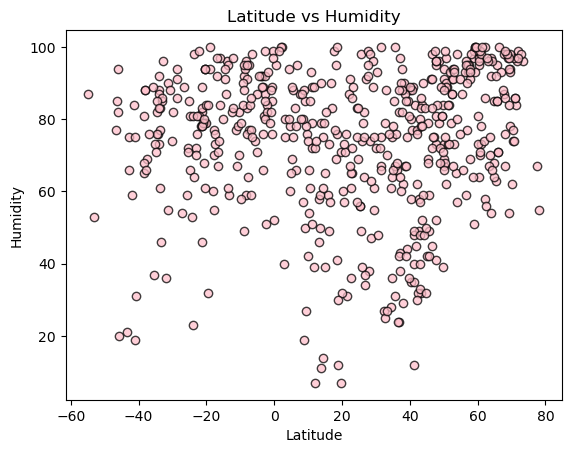

In [291]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]
plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.scatter(x_axis, y_axis, marker="o", facecolors="pink", edgecolors="black", alpha=0.75)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

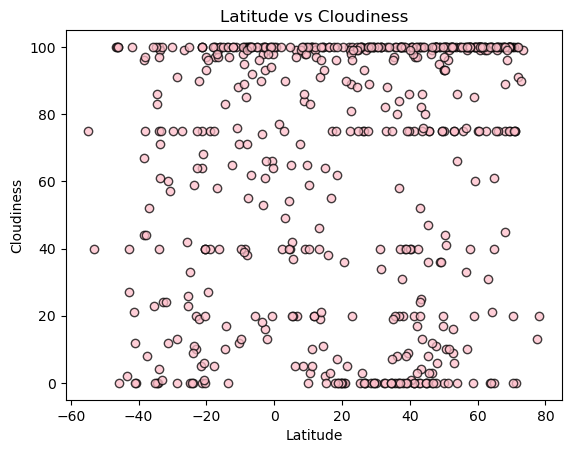

In [292]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.scatter(x_axis, y_axis, marker="o", facecolors="pink", edgecolors="black", alpha=0.75)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

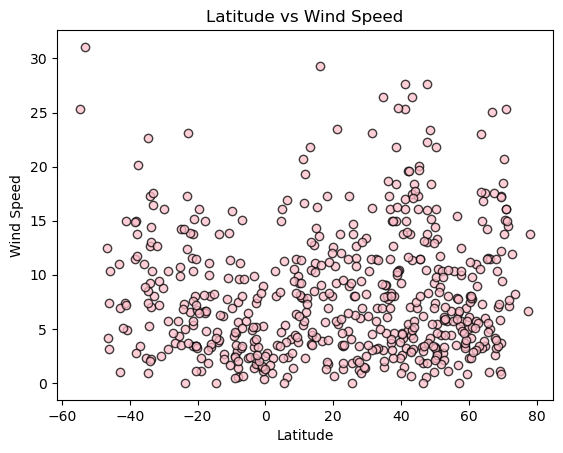

In [293]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]
plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.scatter(x_axis, y_axis, marker="o", facecolors="pink", edgecolors="black", alpha=0.75)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [294]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Equation
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    # Calculate y values from slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Plot and Format
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [295]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df["Lat"]>=0)])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qaanaaq,77.4840,-69.3632,-9.09,67,13,6.67,GL,1679254224
1,udachnyy,66.4167,112.4000,-36.69,100,100,4.99,RU,1679254225
2,portland,45.5234,-122.6762,60.46,59,75,11.50,US,1679254124
3,bathsheba,13.2167,-59.5167,84.81,58,40,21.85,BB,1679254234
4,anadyr,64.7500,177.4833,16.30,85,40,5.99,RU,1679254235


In [296]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df["Lat"]<0)])


# Display sample data
southern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,mar del plata,-38.0023,-57.5575,71.83,88,75,13.80,AR,1679254182
8,port elizabeth,-33.9180,25.5701,72.32,92,75,17.27,ZA,1679254239
9,sao joao da barra,-21.6403,-41.0511,86.09,78,5,11.52,BR,1679254076
10,vaini,-21.2000,-175.2000,78.96,89,75,10.36,TO,1679254240
11,airai,-8.9266,125.4092,58.06,92,100,2.51,TL,1679254241
...,...,...,...,...,...,...,...,...,...
535,utete,-7.9860,38.7580,73.24,95,99,2.04,TZ,1679254663
541,touros,-5.1989,-35.4608,74.89,87,100,6.49,BR,1679254667
543,hukuntsi,-24.0000,21.7500,78.84,23,9,14.23,BW,1679254668


###  Temperature vs. Latitude Linear Regression Plot

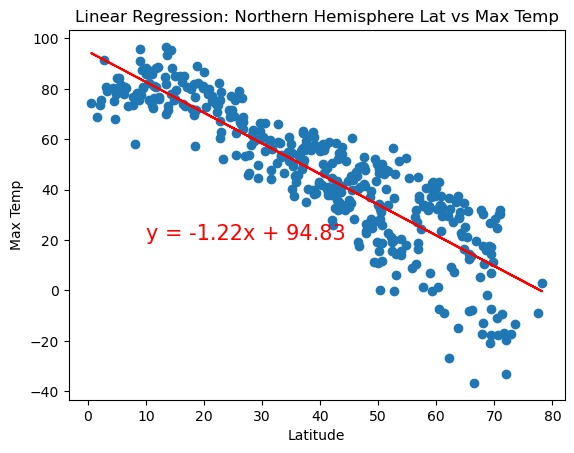

In [326]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
linear_regression(x_values, y_values, "Linear Regression: Northern Hemisphere Lat vs Max Temp", "Max Temp",(10,20))
plt.show()

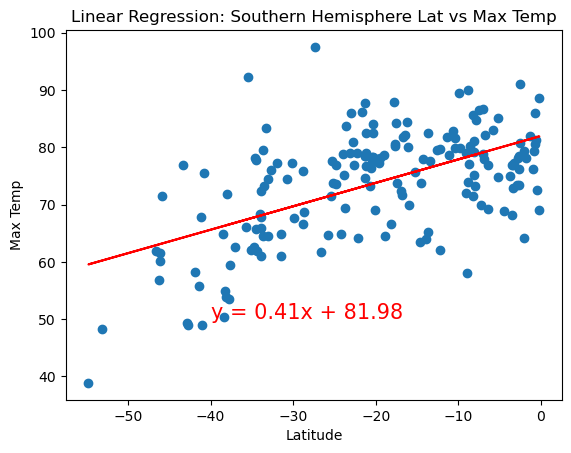

In [325]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
linear_regression(x_values, y_values, "Linear Regression: Southern Hemisphere Lat vs Max Temp", "Max Temp",(-40,50))
plt.show()

**Discussion about the linear relationship:** There is a negative correlation between max temp and latitude in the Northern Hemipshere. As the latitude increases, the max temp decreases. The inverse relationship exists in the Southern Hemisphere (a positive correlation) - as latitide increases, so does max temp.

### Humidity vs. Latitude Linear Regression Plot

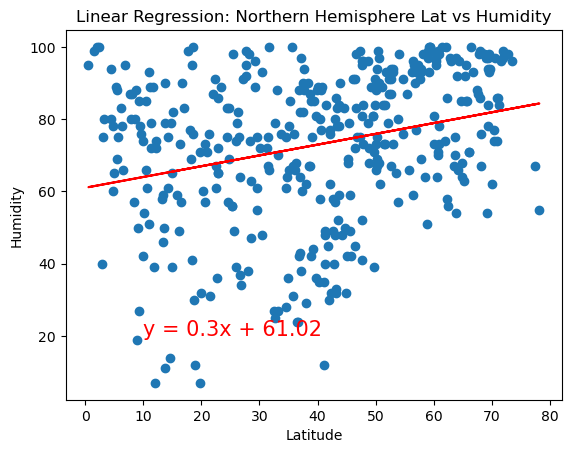

In [324]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
linear_regression(x_values, y_values, "Linear Regression: Northern Hemisphere Lat vs Humidity", "Humidity",(10,20))
plt.show()

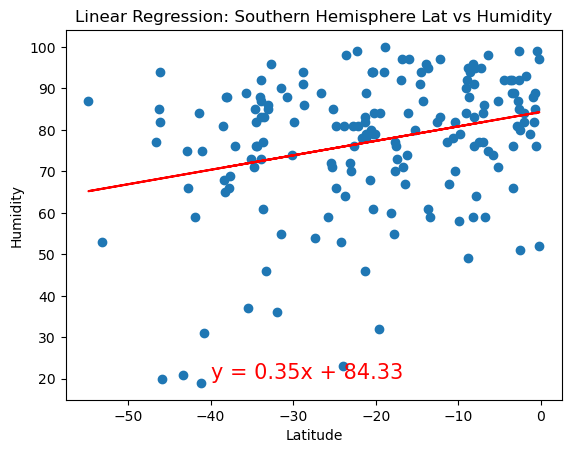

In [323]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
linear_regression(x_values, y_values, "Linear Regression: Southern Hemisphere Lat vs Humidity", "Humidity",(-40,20))
plt.show()

**Discussion about the linear relationship:** There is a positive correlation between latitude and humidity - this is observed in both the northern/southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

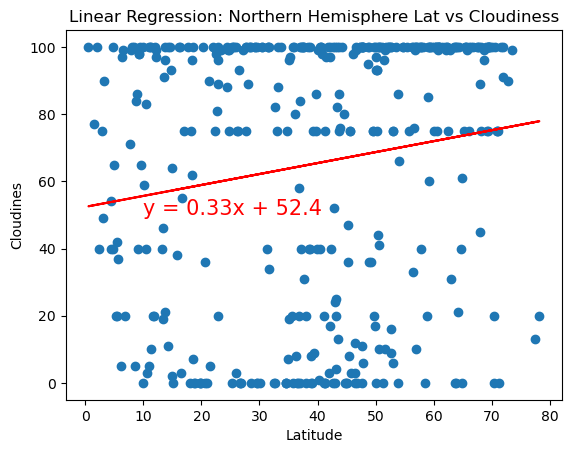

In [327]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
linear_regression(x_values, y_values, "Linear Regression: Northern Hemisphere Lat vs Cloudiness", "Cloudines",(10,50))
plt.show()


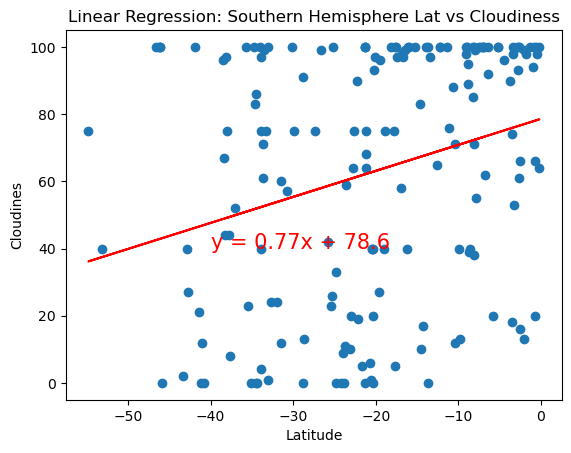

In [328]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
linear_regression(x_values, y_values, "Linear Regression: Southern Hemisphere Lat vs Cloudiness", "Cloudines",(-40,40))
plt.show()


**Discussion about the linear relationship:** There appears to be a slight positive correlation between cloudiness and latitude in both the southern hemisphere. The relationship in the northern hemisphere looks postive at face value, but it is liekly driven by a the large sample size of cities with 100% cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

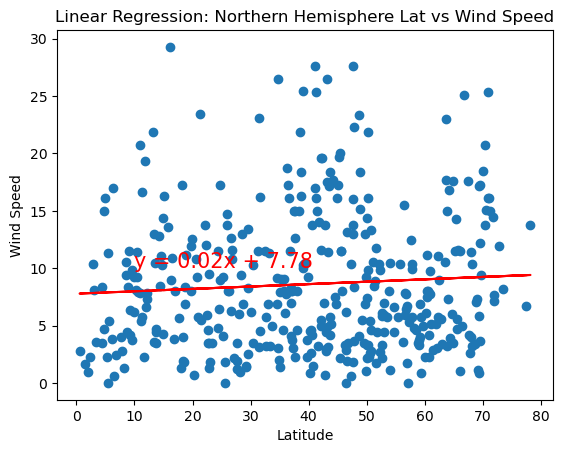

In [329]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
linear_regression(x_values, y_values, "Linear Regression: Northern Hemisphere Lat vs Wind Speed", "Wind Speed",(10,10))
plt.show()

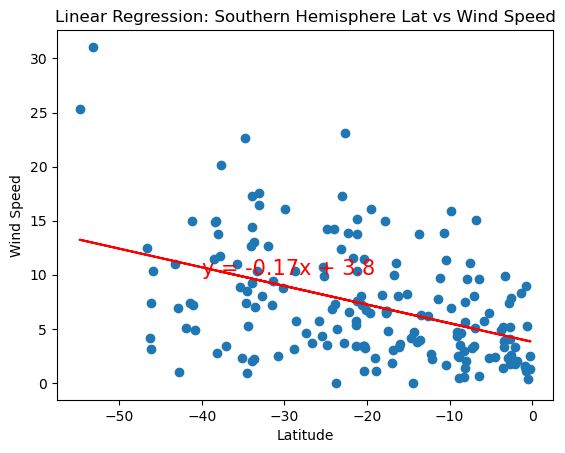

In [330]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
linear_regression(x_values, y_values, "Linear Regression: Southern Hemisphere Lat vs Wind Speed", "Wind Speed",(-40,10))
plt.show()

**Discussion about the linear relationship:** There is a negative correlation between wind speed and latitude within the southern hemipshere. There is a slightly positive correlation in the southern hemisphere.